In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import temperature
from kid_readout.analysis.resonator.plot_resonator import amplitude

In [4]:
npd = npy.NumpyDirectory('/data/detectors/2016-10-20_090919_sweep_stream_on_off_lo_0.1_MHz/')

In [5]:
npd.node_names()

['SingleSweepStream0',
 'SingleSweep1',
 'SingleStream2',
 'ADCSnap3',
 'SingleSweepStream4',
 'SingleSweep5',
 'SingleStream6',
 'ADCSnap7',
 'SingleSweepStream8',
 'SingleSweep9',
 'SingleStream10',
 'ADCSnap11',
 'SingleSweepStream12',
 'SingleSweep13',
 'SingleStream14',
 'ADCSnap15',
 'SingleSweepStream16',
 'SingleSweep17',
 'SingleStream18',
 'ADCSnap19',
 'SingleSweepStream20',
 'SingleSweep21',
 'SingleStream22',
 'ADCSnap23',
 'SingleSweepStream24',
 'SingleSweep25',
 'SingleStream26',
 'ADCSnap27']

In [6]:
all_sss = [npd.read(name) for name in npd.node_names() if name.startswith('SingleSweepStream')]

In [7]:
all_snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [8]:
[(snap.x.ptp(), snap.y.ptp()) for snap in all_snaps]

[(51.0, 56.0),
 (41.0, 50.0),
 (52.0, 49.0),
 (23.0, 23.0),
 (18.0, 18.0),
 (16.0, 16.0),
 (14.0, 16.0)]

In [9]:
for sss in all_sss:
    temperature.add_temperature(sss, cryostat='hpd')

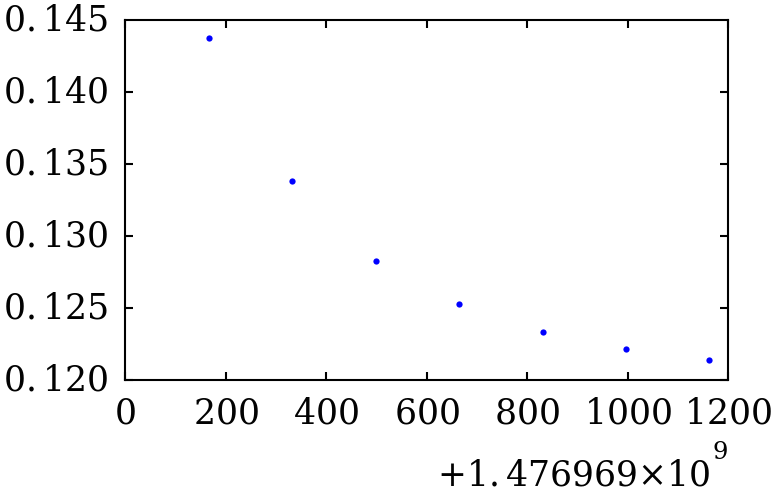

In [10]:
fig, ax = plt.subplots()
ax.plot([sss.stream.epoch for sss in all_sss],
        [sss.state.temperature.package for sss in all_sss],
        '.b')

In [11]:
num_channels = 7
sss_dict = {}
for channel in range(num_channels):
    sss_dict[channel] = [sss for sss in all_sss if sss.state.lo_index == channel]

In [12]:
sss_dict

{0: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f168bf42510>],
 1: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f167f323a50>],
 2: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f167e03b510>],
 3: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f167de24510>],
 4: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f167dd0fbd0>],
 5: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f167dc022d0>],
 6: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f167db64990>]}

Qi: 84183; Qc: 19770


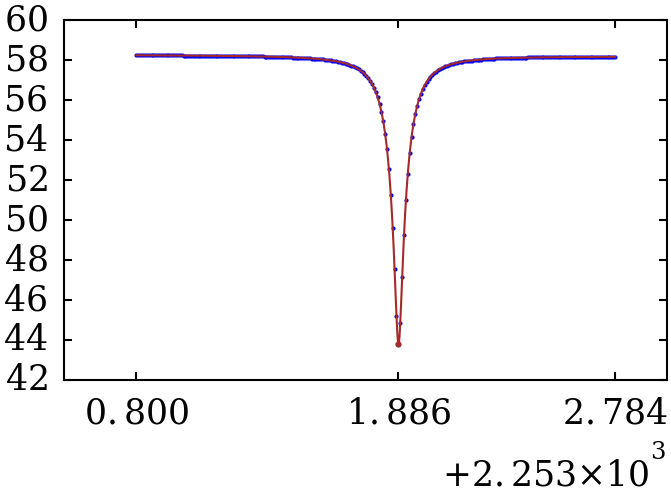

In [13]:
channel = 0
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 17464; Qc: 38010


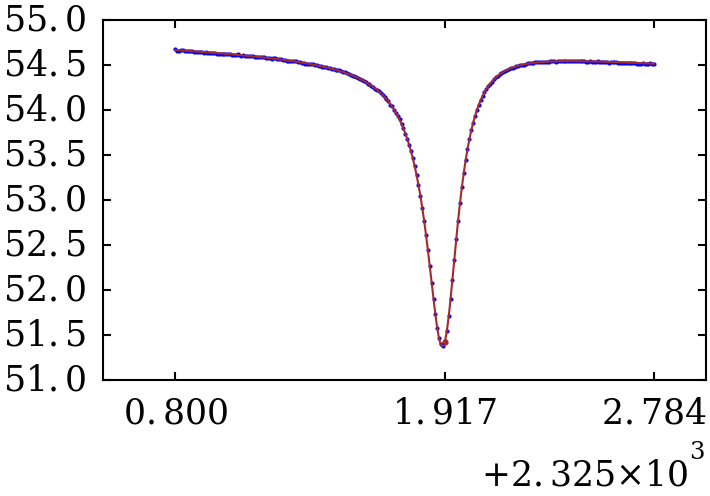

In [14]:
channel = 1
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 56609; Qc: 3962


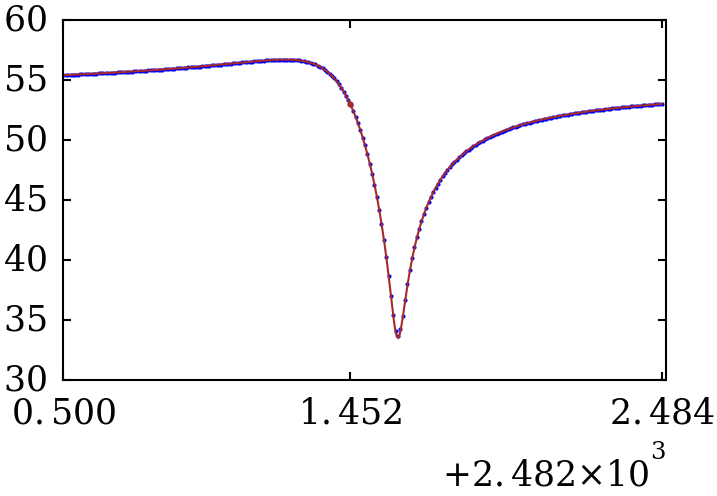

In [15]:
channel = 2
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 89481; Qc: 188789


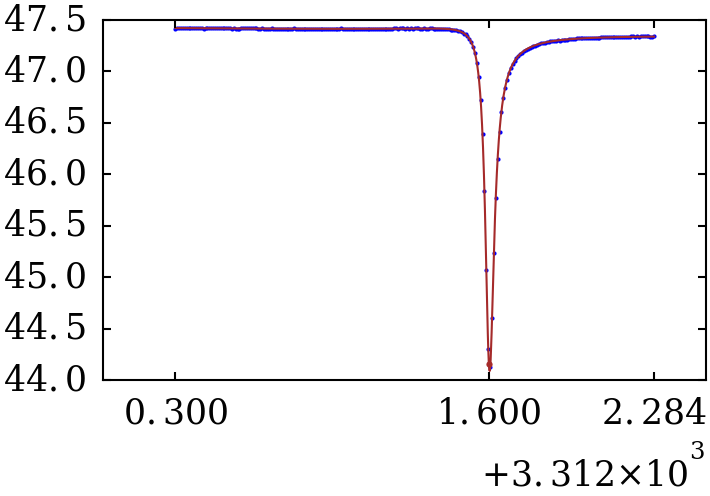

In [16]:
channel = 3
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 112103; Qc: 49961


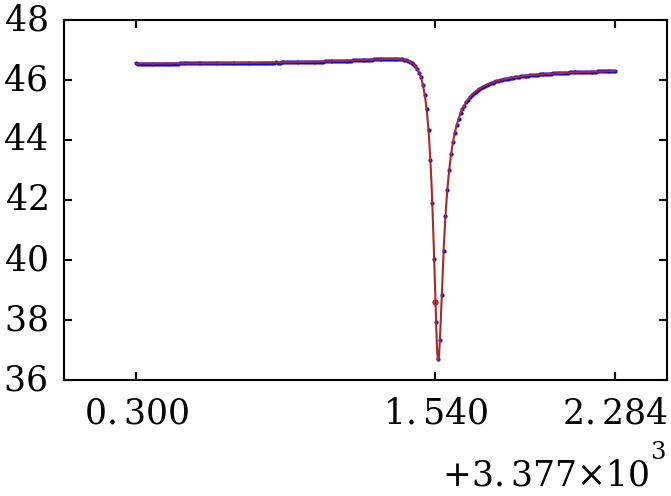

In [17]:
channel = 4
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 122641; Qc: 28228


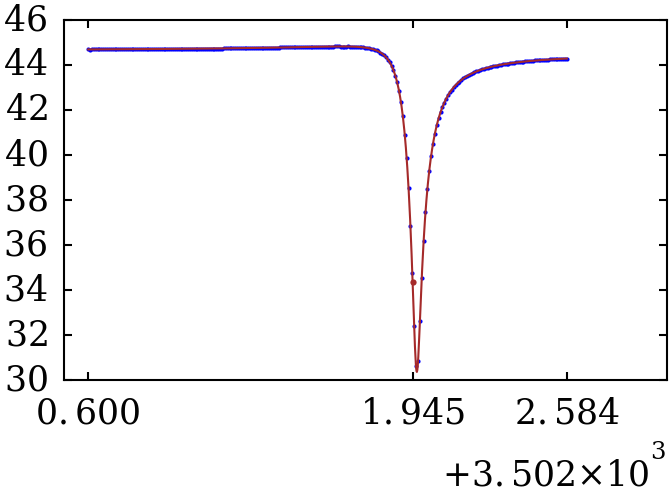

In [18]:
channel = 5
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 63019; Qc: 28280


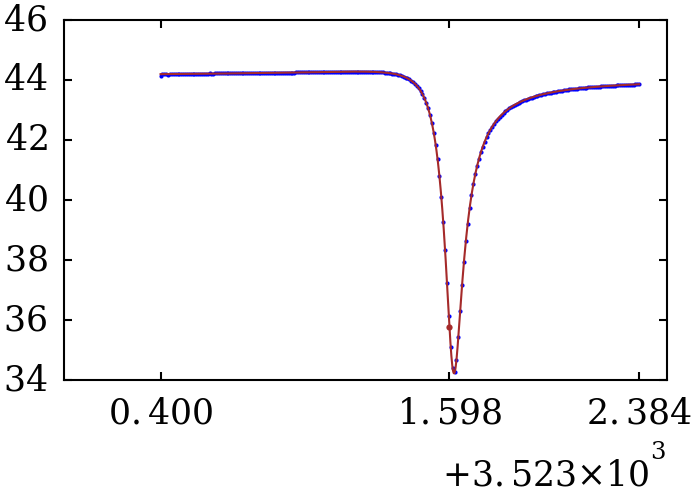

In [19]:
channel = 6
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

In [20]:
f_scale = 1e-9
Qi_color = 'blue'
Qc_color = 'green'

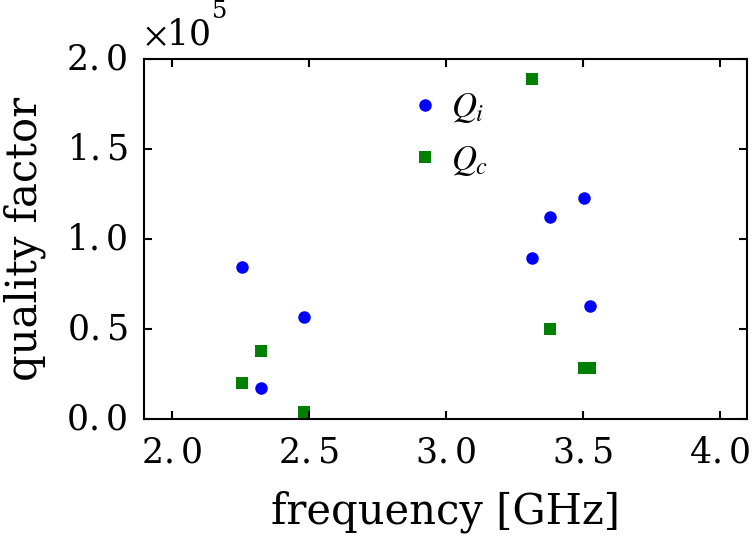

In [21]:
attenuation_index = 0
fig, ax = plt.subplots()
sssl = [sss_list[attenuation_index] for sss_list in sss_dict.values()]
ax.plot([f_scale * sss.resonator.f_0 for sss in sssl],
        [sss.resonator.Q_i for sss in sssl],
        'o', color=Qi_color, label='$Q_i$')
ax.plot([f_scale * sss.resonator.f_0 for sss in sssl],
        [sss.resonator.Q_e_real for sss in sssl],
        's', color=Qc_color, label='$Q_c$')

ax.set_xlabel('frequency [GHz]')
ax.set_ylabel('quality factor')
ax.legend(loc='upper center', numpoints=1)
ax.set_xlim(1.9, 4.1);

#fig.savefig('/home/flanigan/temp/2016-08-11_TwoLayer02-0304_Qi_and_Qc_vs_fr.pdf')

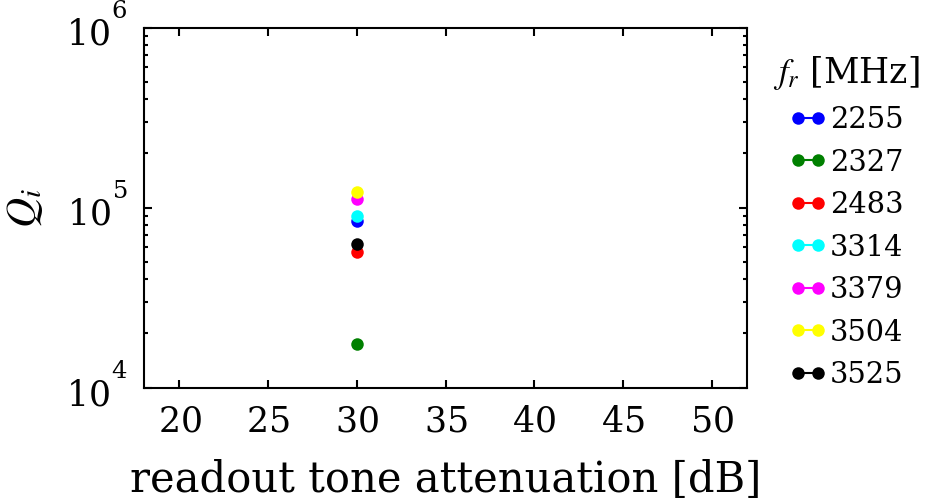

In [22]:
first_good_attenuations = 7 * [0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'gray']

fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_ylabel('$Q_i$')
ax.set_xlabel('readout tone attenuation [dB]')

for channel in range(num_channels):
    sssl = sss_dict[channel][first_good_attenuations[channel]:]
    ax.plot([sss.stream.roach_state.dac_attenuation for sss in sssl],
             [sss.resonator.Q_i for sss in sssl],
            '-', marker='o', color=colors[channel], label='{:.0f}'.format(1e-6 * sssl[-1].resonator.f_0))

legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='xx-small', title=r'$f_r$ [MHz]');
legend.get_title().set_fontsize('x-small')
ax.set_xlim(18, 52);

#fig.savefig('/home/flanigan/temp/2016-08-11_TwoLayer02-0304_Qi_vs_atten.pdf', bbox_inches='tight')

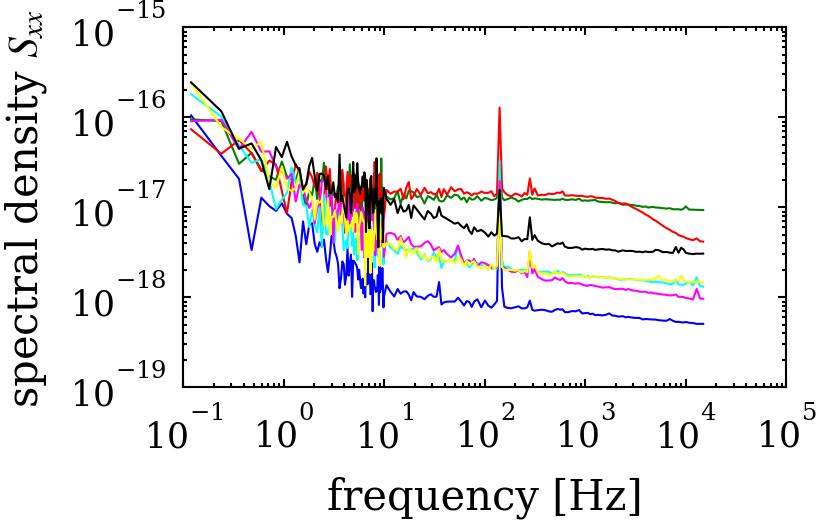

In [23]:
attenuation_index = 0

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('spectral density $S_{xx}$')

for channel, sssl in sss_dict.items():
    sss = sssl[attenuation_index]
    sss.set_S(binned=True)
    ax.plot(sss.S_frequency, sss.S_xx, color=colors[channel])

#fig.savefig('/home/flanigan/temp/2016-08-11_TwoLayer02-0304_all_Sxx_vs_frequency_at_30dB.pdf', bbox_inches='tight')